# ***GENERAL INFORMATION ABOUT DATA***

In [ ]:
import pandas as pd 
import time
col_names = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType','Weekend', 'Revenue']
Data_F_M_P = pd.read_csv("online_shoppers_intention.csv", header=0, names=col_names)

Data_F_M_P.info()
print("\nAs we can see, there is 12330 instances on our dataset.\nThey do not contain null instances...\n")
print("Sample instances can be seen below...")
Data_F_M_P.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# ***Data Preprocess For Frequent Mining***

In [ ]:
pip install kmeans1d

     |████████████████████████████████| 102kB 3.8MB/s 


In [ ]:
import kmeans1d
import numpy as np

Data_A = Data_F_M_P.Administrative
Data_AD = Data_F_M_P.Administrative_Duration
Data_I = Data_F_M_P.Informational
Data_ID = Data_F_M_P.Informational_Duration
Data_PR = Data_F_M_P.ProductRelated
Data_PRD = Data_F_M_P.ProductRelated_Duration
Data_BR = Data_F_M_P.BounceRates
Data_ER = Data_F_M_P.ExitRates
Data_PV = Data_F_M_P.PageValues
Data_SD = Data_F_M_P.SpecialDay
Data_OS = Data_F_M_P.OperatingSystems
Data_B = Data_F_M_P.Browser
Data_R = Data_F_M_P.Region
Data_TT = Data_F_M_P.TrafficType
Data_W = Data_F_M_P.Weekend
Data_Label = Data_F_M_P.Revenue

Data_A_Arr = pd.Series(Data_A).array
Data_AD_Arr = pd.Series(Data_AD).array
Data_I_Arr = pd.Series(Data_I).array
Data_ID_Arr = pd.Series(Data_ID).array
Data_PR_Arr = pd.Series(Data_PR).array
Data_PRD_Arr = pd.Series(Data_PRD).array
Data_BR_Arr = pd.Series(Data_BR).array
Data_ER_Arr = pd.Series(Data_ER).array
Data_PV_Arr = pd.Series(Data_PV).array
Data_SD_Arr = pd.Series(Data_SD).array
Data_OS_Arr = pd.Series(Data_OS).array
Data_B_Arr = pd.Series(Data_B).array
Data_R_Arr = pd.Series(Data_R).array
Data_TT_Arr = pd.Series(Data_TT).array
Data_W_Arr = pd.Series(Data_W).array
Data_Label_Arr = pd.Series(Data_Label).array

clusters, centroids_A = kmeans1d.cluster(Data_A_Arr, 5)
clusters, centroids_AD = kmeans1d.cluster(Data_AD_Arr, 5)
clusters, centroids_I = kmeans1d.cluster(Data_I_Arr, 5)
clusters, centroids_ID = kmeans1d.cluster(Data_ID_Arr, 5)
clusters, centroids_PR = kmeans1d.cluster(Data_PR_Arr, 5)
clusters, centroids_PRD = kmeans1d.cluster(Data_PRD_Arr, 5)
clusters, centroids_BR = kmeans1d.cluster(Data_BR_Arr, 5)
clusters, centroids_ER = kmeans1d.cluster(Data_ER_Arr, 5)
clusters, centroids_PV = kmeans1d.cluster(Data_PV_Arr, 5)
clusters, centroids_SD = kmeans1d.cluster(Data_SD_Arr, 5)


def find_Centroid(arr):
  Out = np.array([0.0, 0.0, 0.0, 0.0])
  Out[0] = (arr[0] + arr[1]) / 2
  Out[1] = (arr[1] + arr[2]) / 2
  Out[2] = (arr[2] + arr[3]) / 2
  Out[3] = (arr[3] + arr[4]) / 2
  return Out

Cat_A = find_Centroid(centroids_A)
Cat_AD = find_Centroid(centroids_AD)
Cat_I = find_Centroid(centroids_I)
Cat_ID = find_Centroid(centroids_ID)
Cat_PR = find_Centroid(centroids_PR)
Cat_PRD = find_Centroid(centroids_PRD)
Cat_BR = find_Centroid(centroids_BR)
Cat_ER = find_Centroid(centroids_ER)
Cat_PV = find_Centroid(centroids_PV)
Cat_SD = find_Centroid(centroids_SD)


def find_Category(data, cat, ab):
  cat_data = []
  for every_data in data:
    if( float(every_data) <= cat[0]):
      string = ab+"_1"
      cat_data.append(string)
    elif( float(every_data) <= cat[1]):
      string = ab+"_2"
      cat_data.append(string)
    elif( float(every_data) <= cat[2]):
      string = ab+"_3"
      cat_data.append(string)
    elif( float(every_data) <= cat[3]):
      string = ab+"_4"
      cat_data.append(string)
    else:
      string = ab+"_5"
      cat_data.append(string)
  return cat_data

Data_A_Cat = find_Category(Data_A, Cat_A, "A")
Data_AD_Cat = find_Category(Data_AD, Cat_AD, "AD")
Data_I_Cat = find_Category(Data_I, Cat_I, "I")
Data_ID_Cat = find_Category(Data_ID, Cat_ID, "ID")
Data_PR_Cat = find_Category(Data_PR, Cat_PR, "PR")
Data_PRD_Cat = find_Category(Data_PRD, Cat_PRD, "PRD")
Data_BR_Cat = find_Category(Data_BR, Cat_BR, "BR")
Data_ER_Cat = find_Category(Data_ER, Cat_ER, "ER")
Data_PV_Cat = find_Category(Data_PV, Cat_PV, "PV")
Data_SD_Cat = find_Category(Data_SD, Cat_SD, "SD")


def change_Data(arr, ab):
  data = []
  for i in arr:
    string = str(ab) + "_" + str(i)
    data.append(string)
  return data



In [ ]:
df_Data_A_Cat = pd.get_dummies(Data_A_Cat)
df_Data_AD_Cat = pd.get_dummies(Data_AD_Cat)
df_Data_I_Cat = pd.get_dummies(Data_I_Cat)
df_Data_ID_Cat = pd.get_dummies(Data_ID_Cat)
df_Data_PR_Cat = pd.get_dummies(Data_PR_Cat)
df_Data_PRD_Cat = pd.get_dummies(Data_PRD_Cat)
df_Data_BR_Cat = pd.get_dummies(Data_BR_Cat)
df_Data_ER_Cat = pd.get_dummies(Data_ER_Cat)
df_Data_PV_Cat = pd.get_dummies(Data_PV_Cat)
df_Data_SD_Cat = pd.get_dummies(Data_SD_Cat)
df_Data_Month = pd.get_dummies(Data_F_M_P.Month)

Cat_OS = change_Data(Data_OS_Arr, "OS")
df_Data_OS_Cat = pd.get_dummies(Cat_OS)

Cat_B = change_Data(Data_B_Arr, "B")
df_Data_B_Cat = pd.get_dummies(Cat_B)

Cat_R = change_Data(Data_R_Arr, "R")
df_Data_R_Cat = pd.get_dummies(Cat_R)

Cat_TT = change_Data(Data_TT_Arr, "TT")
df_Data_TT_Cat = pd.get_dummies(Cat_TT)

df_Data_VT_Cat = pd.get_dummies(Data_F_M_P.VisitorType)

Cat_W = change_Data(Data_W_Arr, "W")
df_Data_W_Cat = pd.get_dummies(Cat_W)

Cat_Label = change_Data(Data_Label_Arr, "Revenue")
df_Data_Label_Cat = pd.get_dummies(Cat_Label)




In [ ]:
print("Since we have change numerical data to categorical data, the new category is looking like this: \n")

print("For Administrative : A_1 < "+ str(Cat_A[0]) + " < A_2 < "+ str(Cat_A[1]) + " < A_3 < "+ str(Cat_A[2]) + " < A_4 < "+ str(Cat_A[3]) + " < A_5")
print("For Administrative_Duration : AD_1 < "+ str(Cat_AD[0]) + " < AD_2 < "+ str(Cat_AD[1]) + " < AD_3 < "+ str(Cat_AD[2]) + " < AD_4 < "+ str(Cat_AD[3]) + " < AD_5")
print("For Informational : I_1 < "+ str(Cat_I[0]) + " < I_2 < "+ str(Cat_I[1]) + " < I_3 < "+ str(Cat_I[2]) + " < I_4 < "+ str(Cat_I[3]) + " < I_5")
print("For Informational_Duration : ID_1 < "+ str(Cat_ID[0]) + " < ID_2 < "+ str(Cat_ID[1]) + " < ID_3 < "+ str(Cat_ID[2]) + " < ID_4 < "+ str(Cat_ID[3]) + " < ID_5")
print("For ProductRelated : PR_1 < "+ str(Cat_PR[0]) + " < PR_2 < "+ str(Cat_PR[1]) + " < PR_3 < "+ str(Cat_PR[2]) + " < PR_4 < "+ str(Cat_PR[3]) + " < PR_5")
print("For ProductRelated_Duration : PRD_1 < "+ str(Cat_PRD[0]) + " < PRD_2 < "+ str(Cat_PRD[1]) + " < PRD_3 < "+ str(Cat_PRD[2]) + " < PRD_4 < "+ str(Cat_PRD[3]) + " < PRD_5")
print("For BounceRates : BR_1 < "+ str(Cat_BR[0]) + " < BR_2 < "+ str(Cat_BR[1]) + " < BR_3 < "+ str(Cat_BR[2]) + " < BR_4 < "+ str(Cat_BR[3]) + " < BR_5")
print("For ExitRates : ER_1 < "+ str(Cat_ER[0]) + " < ER_2 < "+ str(Cat_ER[1]) + " < ER_3 < "+ str(Cat_ER[2]) + " < ER_4 < "+ str(Cat_ER[3]) + " < ER_5")
print("For PageValues : PV_1 < "+ str(Cat_PV[0]) + " < PV_2 < "+ str(Cat_PV[1]) + " < PV_3 < "+ str(Cat_PV[2]) + " < PV_4 < "+ str(Cat_PV[3]) + " < PV_5")
print("For SpecialDay : SD_1 < "+ str(Cat_SD[0]) + " < SD_2 < "+ str(Cat_SD[1]) + " < SD_3 < "+ str(Cat_SD[2]) + " < SD_4 < "+ str(Cat_SD[3]) + " < SD_5")

Since we have change numerical data to categorical data, the new category is looking like this: 

For Administrative : A_1 < 1.532602306824688 < A_2 < 4.34944064950651 < A_3 < 7.606989368724594 < A_4 < 12.413403317098851 < A_5
For Administrative_Duration : AD_1 < 74.23691653436889 < AD_2 < 240.4002441486402 < AD_3 < 550.3254789482 < AD_4 < 1187.1870644196533 < AD_5
For Informational : I_1 < 0.7057659694742804 < I_2 < 2.390151351534081 < I_3 < 4.607292871046585 < I_4 < 8.331998398077694 < I_5
For Informational_Duration : ID_1 < 79.84259676160222 < ID_2 < 289.7912460722083 < ID_3 < 656.3091289472616 < ID_4 < 1283.9265374540312 < ID_5
For ProductRelated : PR_1 < 25.580363967867438 < PR_2 < 66.46363558298239 < PR_3 < 135.43613796055214 < PR_4 < 273.3337435056056 < PR_5
For ProductRelated_Duration : PRD_1 < 1114.0451696475359 < PRD_2 < 3194.4972051542445 < PRD_3 < 7283.444989482803 < PRD_4 < 20154.43662074202 < PRD_5
For BounceRates : BR_1 < 0.010748268832862251 < BR_2 < 0.03560063548329395

In [ ]:
DF_F_P_M = pd.concat((df_Data_A_Cat, df_Data_AD_Cat, df_Data_I_Cat, df_Data_ID_Cat, df_Data_PR_Cat, df_Data_PRD_Cat), axis=1)
DF_F_P_M = pd.concat((DF_F_P_M, df_Data_BR_Cat, df_Data_ER_Cat, df_Data_PV_Cat, df_Data_SD_Cat, df_Data_Month, df_Data_B_Cat), axis=1)
DF_F_P_M = pd.concat((DF_F_P_M, df_Data_OS_Cat, df_Data_R_Cat, df_Data_TT_Cat, df_Data_VT_Cat, df_Data_W_Cat, df_Data_Label_Cat), axis=1)
print("Our final Data Frame is looking like: \n")
print(DF_F_P_M)

Our final Data Frame is looking like: 

       A_1  A_2  A_3  A_4  ...  W_False  W_True  Revenue_False  Revenue_True
0        1    0    0    0  ...        1       0              1             0
1        1    0    0    0  ...        1       0              1             0
2        1    0    0    0  ...        1       0              1             0
3        1    0    0    0  ...        1       0              1             0
4        1    0    0    0  ...        0       1              1             0
...    ...  ...  ...  ...  ...      ...     ...            ...           ...
12325    0    1    0    0  ...        0       1              1             0
12326    1    0    0    0  ...        0       1              1             0
12327    1    0    0    0  ...        0       1              1             0
12328    0    1    0    0  ...        1       0              1             0
12329    1    0    0    0  ...        0       1              1             0

[12330 rows x 117 columns]


# ***APRIORI Frequent Pattern Mining***



In [ ]:
!pip install kmeans1d
!pip install mlxtend --upgrade --no-deps

     |████████████████████████████████| 1.4MB 5.5MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import association_rules, apriori
start_time = time.time()
DF_Apriori = DF_F_P_M

# Not taking frequent_itemsets that have a support less than 0.7
frequent_itemsets = apriori(DF_Apriori, min_support=0.7, use_colnames=True)

print('\nFrequent Itemsets: ')
print(frequent_itemsets)



Frequent Itemsets: 
     support                            itemsets
0   0.707461                              (AD_1)
1   0.786618                               (I_1)
2   0.903893                              (ID_1)
3   0.857178                              (PV_1)
4   0.898540                              (SD_1)
5   0.855718                 (Returning_Visitor)
6   0.767397                           (W_False)
7   0.845255                     (Revenue_False)
8   0.786618                         (I_1, ID_1)
9   0.700487                         (I_1, SD_1)
10  0.783861                        (PV_1, ID_1)
11  0.808597                        (SD_1, ID_1)
12  0.768289           (Returning_Visitor, ID_1)
13  0.773966               (Revenue_False, ID_1)
14  0.763341                        (SD_1, PV_1)
15  0.742822           (Returning_Visitor, PV_1)
16  0.797080               (Revenue_False, PV_1)
17  0.758962           (SD_1, Returning_Visitor)
18  0.750041               (Revenue_False, SD_1)

In [ ]:
pd.set_option
#pd.set_option('max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', 300)

association_r = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print('\nAssociation Rules: ')
print(association_r)

# resetting the values to default 
#pd.reset_option("display.max_rows") 
pd.reset_option("display.max_colwidth") 
pd.reset_option("display.max_columns") 


Association Rules: 
              antecedents            consequents  antecedent support  \
0                   (I_1)                 (ID_1)            0.786618   
1                  (ID_1)                  (I_1)            0.903893   
2                  (PV_1)                 (ID_1)            0.857178   
3                  (ID_1)                 (PV_1)            0.903893   
4         (Revenue_False)                 (ID_1)            0.845255   
5                  (ID_1)        (Revenue_False)            0.903893   
6     (Returning_Visitor)                 (PV_1)            0.855718   
7                  (PV_1)    (Returning_Visitor)            0.857178   
8         (Revenue_False)                 (PV_1)            0.845255   
9                  (PV_1)        (Revenue_False)            0.857178   
10        (Revenue_False)    (Returning_Visitor)            0.845255   
11    (Returning_Visitor)        (Revenue_False)            0.855718   
12            (I_1, SD_1)                 (

In [ ]:
antecendents_arr = association_r.antecedents
consequents_arr = association_r.consequents
support_arr = association_r.support

for i in range(len(support_arr)):
  a_ls = list(antecendents_arr[i])
  c_ls = list(consequents_arr[i])

  revenue_true = "Revenue_True"
  revenue_false = "Revenue_False"
  if revenue_true in str(a_ls):
    message = "If Revenue True then it contains " + str(c_ls) + "  with support " + str(support_arr[i])
    print(message)
  elif revenue_false in str(a_ls):
    message = "If Revenue False then it contains " + str(c_ls) + "  with support " + str(support_arr[i])
    print(message)
print("--- Apriori: %s seconds ---" % (time.time() - start_time))

If Revenue False then it contains ['ID_1']  with support 0.7739659367396594
If Revenue False then it contains ['PV_1']  with support 0.7970802919708029
If Revenue False then it contains ['Returning_Visitor']  with support 0.7364963503649635
If Revenue False then it contains ['ID_1']  with support 0.7360908353609084
If Revenue False then it contains ['PV_1']  with support 0.7360908353609084
If Revenue False then it contains ['PV_1', 'ID_1']  with support 0.7360908353609084
If Revenue False then it contains ['PV_1']  with support 0.7047039740470398
If Revenue False then it contains ['SD_1', 'PV_1']  with support 0.7047039740470398
--- Apriori: 13.549505949020386 seconds ---


# ***FP-GROWTH Frequent Pattern Mining***

In [ ]:
!pip install kmeans1d
!pip install mlxtend --upgrade --no-deps

Requirement already up-to-date: mlxtend in /usr/local/lib/python3.6/dist-packages (0.18.0)


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules

start_time = time.time()

DF_FP_Growth = DF_F_P_M

fp_frequent_itemset = fpgrowth(DF_FP_Growth, min_support=0.7, use_colnames=True)
print("Frequent item set has been listed below...")
print(fp_frequent_itemset)


Frequent item set has been listed below...
     support                            itemsets
0   0.903893                              (ID_1)
1   0.898540                              (SD_1)
2   0.857178                              (PV_1)
3   0.855718                 (Returning_Visitor)
4   0.845255                     (Revenue_False)
5   0.786618                               (I_1)
6   0.767397                           (W_False)
7   0.707461                              (AD_1)
8   0.808597                        (SD_1, ID_1)
9   0.783861                        (PV_1, ID_1)
10  0.763341                        (SD_1, PV_1)
11  0.768289           (Returning_Visitor, ID_1)
12  0.758962           (SD_1, Returning_Visitor)
13  0.742822           (Returning_Visitor, PV_1)
14  0.797080               (PV_1, Revenue_False)
15  0.773966               (ID_1, Revenue_False)
16  0.750041               (SD_1, Revenue_False)
17  0.736496  (Returning_Visitor, Revenue_False)
18  0.736091         (PV_1

In [ ]:
pd.set_option
#pd.set_option('max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', 100)

asc_rules = association_rules(fp_frequent_itemset, metric="lift",min_threshold=1)
print('\nAssociation Rules: ')
print(asc_rules)

# resetting the values to default 
#pd.reset_option("display.max_rows") 
pd.reset_option("display.max_colwidth") 
pd.reset_option("display.max_columns")


Association Rules: 
              antecedents            consequents  antecedent support  \
0                  (PV_1)                 (ID_1)            0.857178   
1                  (ID_1)                 (PV_1)            0.903893   
2     (Returning_Visitor)                 (PV_1)            0.855718   
3                  (PV_1)    (Returning_Visitor)            0.857178   
4                  (PV_1)        (Revenue_False)            0.857178   
5         (Revenue_False)                 (PV_1)            0.845255   
6                  (ID_1)        (Revenue_False)            0.903893   
7         (Revenue_False)                 (ID_1)            0.845255   
8     (Returning_Visitor)        (Revenue_False)            0.855718   
9         (Revenue_False)    (Returning_Visitor)            0.845255   
10           (PV_1, ID_1)        (Revenue_False)            0.783861   
11  (PV_1, Revenue_False)                 (ID_1)            0.797080   
12  (ID_1, Revenue_False)                 (

In [ ]:
antecendents_arr = asc_rules.antecedents
consequents_arr = asc_rules.consequents
support_arr = asc_rules.support

for i in range(len(support_arr)):
  a_ls = list(antecendents_arr[i])
  c_ls = list(consequents_arr[i])

  revenue_true = "Revenue_True"
  revenue_false = "Revenue_False"
  if revenue_true in str(a_ls):
    message = "If Revenue True then it contains " + str(c_ls) + "  with support " + str(support_arr[i])
    print(message)
  elif revenue_false in str(a_ls):
    message = "If Revenue False then it contains " + str(c_ls) + "  with support " + str(support_arr[i])
    print(message)
print("--- FP Growth: %s seconds ---" % (time.time() - start_time))



If Revenue False then it contains ['PV_1']  with support 0.7970802919708029
If Revenue False then it contains ['ID_1']  with support 0.7739659367396594
If Revenue False then it contains ['Returning_Visitor']  with support 0.7364963503649635
If Revenue False then it contains ['ID_1']  with support 0.7360908353609084
If Revenue False then it contains ['PV_1']  with support 0.7360908353609084
If Revenue False then it contains ['PV_1', 'ID_1']  with support 0.7360908353609084
If Revenue False then it contains ['PV_1']  with support 0.7047039740470398
If Revenue False then it contains ['SD_1', 'PV_1']  with support 0.7047039740470398
--- FP Growth: 0.21065115928649902 seconds ---


# ***ECLAT Frequent Pattern Mining***

In [ ]:
pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp36-none-any.whl size=5977 sha256=8b3891f514daaa0914e6c48232b88376db444dfab744eb7c92fdac6d61f15ee3
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [ ]:
#import library
import pandas as pd
from apyori import apriori
from mlxtend.frequent_patterns import apriori,association_rules

DF_Eclat = DF_F_P_M

start_time = time.time()

frequent_itemsets = apriori(DF_Eclat, min_support=0.7, use_colnames=True)
#bulid association rules using support metric
rules = association_rules(frequent_itemsets, metric="support", support_only=True, min_threshold=0.1 )

#use only support metric in Eclat algo using apriori

rules = rules[['antecedents', 'consequents', 'support']]
ruless = rules.sort_values('support', ascending=False)

print(ruless)

              antecedents            consequents   support
6                  (SD_1)                 (ID_1)  0.808597
7                  (ID_1)                 (SD_1)  0.808597
16                 (PV_1)        (Revenue_False)  0.797080
17        (Revenue_False)                 (PV_1)  0.797080
0                  (ID_1)                  (I_1)  0.786618
1                   (I_1)                 (ID_1)  0.786618
5                  (ID_1)                 (PV_1)  0.783861
4                  (PV_1)                 (ID_1)  0.783861
10                 (ID_1)        (Revenue_False)  0.773966
11        (Revenue_False)                 (ID_1)  0.773966
9                  (ID_1)    (Returning_Visitor)  0.768289
8     (Returning_Visitor)                 (ID_1)  0.768289
12                 (SD_1)                 (PV_1)  0.763341
13                 (PV_1)                 (SD_1)  0.763341
19    (Returning_Visitor)                 (SD_1)  0.758962
18                 (SD_1)    (Returning_Visitor)  0.7589

In [ ]:
antecendents_arr = rules.antecedents
consequents_arr = rules.consequents
support_arr = rules.support

for i in range(len(support_arr)):
  a_ls = list(antecendents_arr[i])
  c_ls = list(consequents_arr[i])

  revenue_true = "Revenue_True"
  revenue_false = "Revenue_False"
  if revenue_true in str(a_ls):
    message = "If Revenue True then it contains " + str(c_ls) + "  with support " + str(support_arr[i])
    print(message)
  elif revenue_false in str(a_ls):
    message = "If Revenue False then it contains " + str(c_ls) + "  with support " + str(support_arr[i])
    print(message)
print("--- ECLAT: %s seconds ---" % (time.time() - start_time))



If Revenue False then it contains ['ID_1']  with support 0.7739659367396594
If Revenue False then it contains ['PV_1']  with support 0.7970802919708029
If Revenue False then it contains ['SD_1']  with support 0.7500405515004055
If Revenue False then it contains ['Returning_Visitor']  with support 0.7364963503649635
If Revenue False then it contains ['ID_1']  with support 0.7360908353609084
If Revenue False then it contains ['PV_1']  with support 0.7360908353609084
If Revenue False then it contains ['PV_1', 'ID_1']  with support 0.7360908353609084
If Revenue False then it contains ['PV_1']  with support 0.7047039740470398
If Revenue False then it contains ['SD_1']  with support 0.7047039740470398
If Revenue False then it contains ['SD_1', 'PV_1']  with support 0.7047039740470398
--- ECLAT: 0.06887102127075195 seconds ---


# ***Data Preprocess For Clustering***





In [ ]:
import pandas as pd 

col_names = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType','Weekend', 'Revenue']
DF_C = pd.read_csv("online_shoppers_intention.csv", header=0, names=col_names)

DF_C = DF_C.replace('New_Visitor', 0)
DF_C = DF_C.replace('Returning_Visitor', 1)
DF_C = DF_C.replace('Other', 2)
DF_C = DF_C.replace('Feb', 2)
DF_C = DF_C.replace('Mar', 3)
DF_C = DF_C.replace('May', 5)
DF_C = DF_C.replace('June', 6)
DF_C = DF_C.replace('Jul', 7)
DF_C = DF_C.replace('Aug', 8)
DF_C = DF_C.replace('Sep', 9)
DF_C = DF_C.replace('Oct', 10)
DF_C = DF_C.replace('Nov', 11)
DF_C = DF_C.replace('Dec', 12)
DF_C = DF_C.replace(False, 0)
DF_C = DF_C.replace(True, 1)

print("After some preprocess for clustering, information of our dataset can be seen below...")
print(DF_C.info())


After some preprocess for clustering, information of our dataset can be seen below...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int

In [ ]:
'''
True_Label = DF_C.Revenue
DF_C_temp = DF_C
DF_C_temp = DF_C_temp.drop('Revenue', axis=1)
x = preprocessing.normalize(DF_C_temp)

plt.scatter(x[True_Label==0, 0], x[True_Label==0, 1], s=5, c='blue', label ='Revenue_False')
plt.scatter(x[True_Label==1, 0], x[True_Label==1, 1], s=5, c='red', label ='Revenue_True')
plt.title('True Labeled Cluster Plot')
plt.xlabel('')
plt.ylabel('')
plt.legend();
plt.show()
'''

"\nTrue_Label = DF_C.Revenue\nDF_C_temp = DF_C\nDF_C_temp = DF_C_temp.drop('Revenue', axis=1)\nx = preprocessing.normalize(DF_C_temp)\n\nplt.scatter(x[True_Label==0, 0], x[True_Label==0, 1], s=5, c='blue', label ='Revenue_False')\nplt.scatter(x[True_Label==1, 0], x[True_Label==1, 1], s=5, c='red', label ='Revenue_True')\nplt.title('True Labeled Cluster Plot')\nplt.xlabel('')\nplt.ylabel('')\nplt.legend();\nplt.show()\n"

Explained variation per principal component: [0.98773232 0.00754394]


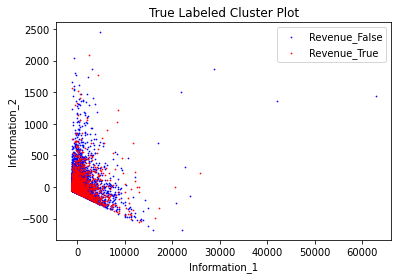

In [ ]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import normalize 
import matplotlib.pyplot as plt

True_Label = DF_C.Revenue
DF_C_temp = DF_C
DF_C_temp = DF_C_temp.drop('Revenue', axis=1)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(DF_C_temp)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

plt.scatter(pca_data[True_Label==0, 0], pca_data[True_Label==0, 1], s=0.5, c='blue', label ='Revenue_False')
plt.scatter(pca_data[True_Label==1, 0], pca_data[True_Label==1, 1], s=0.5, c='red', label ='Revenue_True')
plt.title('True Labeled Cluster Plot')
plt.xlabel('Information_1')
plt.ylabel('Information_2')
plt.legend();
plt.show()

# ***K-Means Clustering Analysis***

In [ ]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

DF_K_Means = DF_C

start_time = time.time()

Y_K_Means = np.array(DF_K_Means['Revenue'])
DF_K_Means = DF_K_Means.drop('Revenue', axis=1)
print('Normalizing data and separating label to test the clustering application')
X_K_Means = preprocessing.normalize(DF_K_Means)

scaler = MinMaxScaler()
X_Scaled_K_Means = scaler.fit_transform(X_K_Means) # Increase of accuracy with 1% (.78)

print('Since we have two values for labels we cluster data into two clusters\n')

kmeans =  KMeans(n_clusters=2) # .77 Normally
kmeans.fit(X_Scaled_K_Means)  

correct = 0 # To keep the count of the correctly clustered entities

for i in range(len(X_K_Means)):
    predict_me = np.array(X_K_Means[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    # print(int(prediction[0]), int(Y_K_Means[i]))
    if int(prediction[0]) == int(Y_K_Means[i]):
        correct += 1

print('Accuracy: ', correct/len(X_K_Means)) # Number of correctly clustered entities according to the lables
print('Inertia: ', kmeans.inertia_) # Sum of squared distances of samples to their closest cluster center.
print('Number of iterations: ', kmeans.n_iter_) # Number of iterations run.
print('Centers of the two clusters: ')
for i in kmeans.cluster_centers_:
  print(i)

Label_K_Means = kmeans.labels_
print("\nHomogeneity: %0.3f" %metrics.homogeneity_score(True_Label, Label_K_Means))
print("Completeness: %0.3f" %metrics.completeness_score(True_Label, Label_K_Means))
print("V-measure: %0.3f" %metrics.v_measure_score(True_Label, Label_K_Means))
print("Adjusted Rand Index: %0.3f" %metrics.adjusted_rand_score(True_Label, Label_K_Means))
print("Adjusted Mutual Information: %0.3f" %metrics.adjusted_mutual_info_score(True_Label, Label_K_Means))
print("Silhouette Coefficient: %0.3f" %metrics.silhouette_score(X_Scaled_K_Means, Label_K_Means))

Normalizing data and separating label to test the clustering application
Since we have two values for labels we cluster data into two clusters

Accuracy:  0.7836171938361719
Inertia:  1247.5919368632851
Number of iterations:  4
Centers of the two clusters: 
[0.01444447 0.10546703 0.0042025  0.02648826 0.04591196 0.95481198
 0.00135085 0.00418109 0.00979373 0.00156843 0.02985307 0.01332065
 0.01153882 0.01413868 0.01753781 0.01164577 0.00348244]
[1.54711946e-02 2.38626389e-02 8.77511873e-03 6.15194687e-03
 1.70300702e-01 2.84151341e-02 3.10339428e-01 3.23381808e-01
 6.07153217e-17 3.61067804e-02 6.35781413e-01 3.22103557e-01
 2.70419406e-01 3.27872373e-01 3.90101672e-01 3.25853099e-01
 6.81002602e-02]

Homogeneity: 0.018
Completeness: 0.033
V-measure: 0.023
Adjusted Rand Index: -0.066
Adjusted Mutual Information: 0.023
Silhouette Coefficient: 0.796


In [ ]:
'''
plt.scatter(X_Scaled_K_Means[Label_K_Means==0, 0], X_Scaled_K_Means[Label_K_Means==0, 1], s=5, c='blue', label ='Revenue_False')
plt.scatter(X_Scaled_K_Means[Label_K_Means==1, 0], X_Scaled_K_Means[Label_K_Means==1, 1], s=5, c='red', label ='Revenue_True')
plt.title('K_Means Cluster Plot')
plt.xlabel('')
plt.ylabel('')
plt.legend();
plt.show()
'''

"\nplt.scatter(X_Scaled_K_Means[Label_K_Means==0, 0], X_Scaled_K_Means[Label_K_Means==0, 1], s=5, c='blue', label ='Revenue_False')\nplt.scatter(X_Scaled_K_Means[Label_K_Means==1, 0], X_Scaled_K_Means[Label_K_Means==1, 1], s=5, c='red', label ='Revenue_True')\nplt.title('K_Means Cluster Plot')\nplt.xlabel('')\nplt.ylabel('')\nplt.legend();\nplt.show()\n"

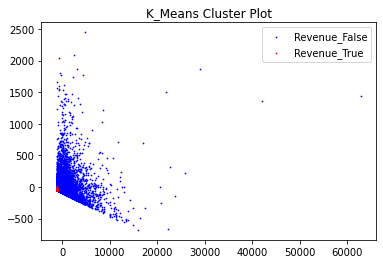

--- K-Means: 7.4846014976501465 seconds ---


In [ ]:
import matplotlib.pyplot as plt
plt.scatter(pca_data[Label_K_Means==0, 0], pca_data[Label_K_Means==0, 1], s=0.5, c='blue', label ='Revenue_False')
plt.scatter(pca_data[Label_K_Means==1, 0], pca_data[Label_K_Means==1, 1], s=0.5, c='red', label ='Revenue_True')
plt.title('K_Means Cluster Plot')
plt.xlabel('')
plt.ylabel('')
plt.legend();
plt.show()
print("--- K-Means: %s seconds ---" % (time.time() - start_time))


# ***AGNES Clustering Analysis***

In [ ]:
import pandas as pd
import kmeans1d
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

DF_AGNES = DF_C

start_time = time.time()

DF_AGNES = DF_AGNES.drop('Revenue', axis=1)
X_AGNES = preprocessing.normalize(DF_AGNES)

Cluster_Agnes = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
predict_label = Cluster_Agnes.fit_predict(X_AGNES)
Label_AGNES = Cluster_Agnes.labels_

print("Homogeneity: %0.3f" %metrics.homogeneity_score(True_Label, Label_AGNES))
print("Completeness: %0.3f" %metrics.completeness_score(True_Label, Label_AGNES))
print("V-measure: %0.3f" %metrics.v_measure_score(True_Label, Label_AGNES))
print("Adjusted Rand Index: %0.3f" %metrics.adjusted_rand_score(True_Label, Label_AGNES))
print("Adjusted Mutual Information: %0.3f" %metrics.adjusted_mutual_info_score(True_Label, Label_AGNES))
print("Silhouette Coefficient: %0.3f" %metrics.silhouette_score(X_AGNES, Label_AGNES))


Homogeneity: 0.022
Completeness: 0.012
V-measure: 0.016
Adjusted Rand Index: -0.035
Adjusted Mutual Information: 0.015
Silhouette Coefficient: 0.639


In [ ]:
'''
plt.scatter(X_AGNES[Label_AGNES==0, 0], X_AGNES[Label_AGNES==0, 1], s=5, c='blue', label ='Revenue_False')
plt.scatter(X_AGNES[Label_AGNES==1, 0], X_AGNES[Label_AGNES==1, 1], s=5, c='red', label ='Revenue_True')
#plt.scatter(X[a==2, 0], value[a==2, 1], s=100, c='green', label ='Cluster 3')
#plt.scatter(X[a==2, 0], X[a==2, 1], s=100, c='green', label ='Cluster 3')
#plt.scatter(X[a==3, 0], X[a==3, 1], s=100, c='cyan', label ='Cluster 4')
#plt.scatter(X[a==4, 0], X[a==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.title('Agnes Cluster Plot')
plt.xlabel('')
plt.ylabel('')
plt.legend();
plt.show()
'''

"\nplt.scatter(X_AGNES[Label_AGNES==0, 0], X_AGNES[Label_AGNES==0, 1], s=5, c='blue', label ='Revenue_False')\nplt.scatter(X_AGNES[Label_AGNES==1, 0], X_AGNES[Label_AGNES==1, 1], s=5, c='red', label ='Revenue_True')\n#plt.scatter(X[a==2, 0], value[a==2, 1], s=100, c='green', label ='Cluster 3')\n#plt.scatter(X[a==2, 0], X[a==2, 1], s=100, c='green', label ='Cluster 3')\n#plt.scatter(X[a==3, 0], X[a==3, 1], s=100, c='cyan', label ='Cluster 4')\n#plt.scatter(X[a==4, 0], X[a==4, 1], s=100, c='magenta', label ='Cluster 5')\nplt.title('Agnes Cluster Plot')\nplt.xlabel('')\nplt.ylabel('')\nplt.legend();\nplt.show()\n"

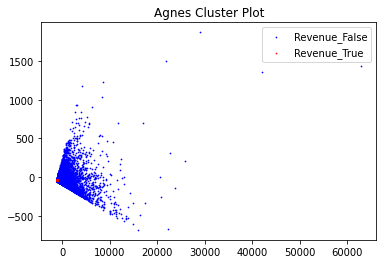

--- AGNES: 19.191159963607788 seconds ---


In [ ]:
plt.scatter(pca_data[Label_AGNES==0, 0], pca_data[Label_AGNES==0, 1], s=0.5, c='blue', label ='Revenue_False')
plt.scatter(pca_data[Label_AGNES==1, 0], pca_data[Label_AGNES==1, 1], s=0.5, c='red', label ='Revenue_True')
plt.title('Agnes Cluster Plot')
plt.xlabel('')
plt.ylabel('')
plt.legend();
plt.show()
print("--- AGNES: %s seconds ---" % (time.time() - start_time))


# ***DBSCAN Clustering Analysis***

In [ ]:
import pandas as pd 
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt

DF_DBSCAN = DF_C

start_time = time.time()


#y = np.array(DF_AGNES['Revenue'])
DF_DBSCAN = DF_DBSCAN.drop('Revenue', axis=1)
X_DBSCAN = preprocessing.normalize(DF_DBSCAN)

Cluster_DBSCAN = DBSCAN(eps=0.25, min_samples=20).fit(X_DBSCAN)
Label_DBSCAN = Cluster_DBSCAN.labels_

core_samples_mask = np.zeros_like(Label_DBSCAN, dtype=bool)
core_samples_mask[Cluster_DBSCAN.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(Label_DBSCAN)) - (1 if -1 in Label_DBSCAN else 0)
n_noise_ = list(Label_DBSCAN).count(-1)


print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(True_Label, Label_DBSCAN))
print("Completeness: %0.3f" % metrics.completeness_score(True_Label, Label_DBSCAN))
print("V-measure: %0.3f" % metrics.v_measure_score(True_Label, Label_DBSCAN))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(True_Label, Label_DBSCAN))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(True_Label, Label_DBSCAN))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_DBSCAN, Label_DBSCAN))

'''
# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_DBSCAN[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='r', markersize=1)

    xy = X_DBSCAN[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='b', markersize=1)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

print("Finished")

'''

Estimated number of clusters: 2
Estimated number of noise points: 159
Homogeneity: 0.019
Completeness: 0.030
V-measure: 0.023
Adjusted Rand Index: -0.064
Adjusted Mutual Information: 0.023
Silhouette Coefficient: 0.746


'\n# Plot result\n# Black removed and is used for noise instead.\nunique_labels = set(labels)\ncolors = [plt.cm.Spectral(each)\n          for each in np.linspace(0, 1, len(unique_labels))]\nfor k, col in zip(unique_labels, colors):\n    if k == -1:\n        # Black used for noise.\n        col = [0, 0, 1]\n\n    class_member_mask = (labels == k)\n\n    xy = X_DBSCAN[class_member_mask & core_samples_mask]\n    plt.plot(xy[:, 0], xy[:, 1], \'o\', markerfacecolor=tuple(col),\n             markeredgecolor=\'r\', markersize=1)\n\n    xy = X_DBSCAN[class_member_mask & ~core_samples_mask]\n    plt.plot(xy[:, 0], xy[:, 1], \'o\', markerfacecolor=tuple(col),\n             markeredgecolor=\'b\', markersize=1)\n\nplt.title(\'Estimated number of clusters: %d\' % n_clusters_)\nplt.show()\n\nprint("Finished")\n\n'

In [ ]:
'''
plt.scatter(pca_data[Label_DBSCAN==-1, 0], pca_data[Label_DBSCAN==-1, 1], s=5, c='black', label ='Noise Points')
plt.scatter(pca_data[Label_DBSCAN==0, 0], pca_data[Label_DBSCAN==0, 1], s=5, c='blue', label ='Revenue_False')
plt.scatter(pca_data[Label_DBSCAN==1, 0], pca_data[Label_DBSCAN==1, 1], s=5, c='red', label ='Revenue_True')
plt.title('DBSCAN Cluster Plot')
plt.xlabel('')
plt.ylabel('')
plt.legend();
plt.show()
'''

"\nplt.scatter(pca_data[Label_DBSCAN==-1, 0], pca_data[Label_DBSCAN==-1, 1], s=5, c='black', label ='Noise Points')\nplt.scatter(pca_data[Label_DBSCAN==0, 0], pca_data[Label_DBSCAN==0, 1], s=5, c='blue', label ='Revenue_False')\nplt.scatter(pca_data[Label_DBSCAN==1, 0], pca_data[Label_DBSCAN==1, 1], s=5, c='red', label ='Revenue_True')\nplt.title('DBSCAN Cluster Plot')\nplt.xlabel('')\nplt.ylabel('')\nplt.legend();\nplt.show()\n"

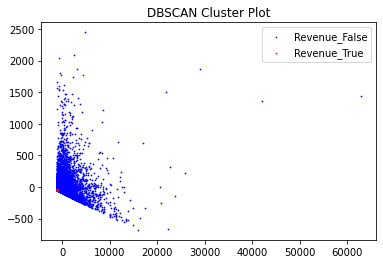

--- DBSCAN: 6.39860463142395 seconds ---


In [ ]:
plt.scatter(pca_data[Label_DBSCAN==0, 0], pca_data[Label_DBSCAN==0, 1], s=0.5, c='blue', label ='Revenue_False')
plt.scatter(pca_data[Label_DBSCAN==1, 0], pca_data[Label_DBSCAN==1, 1], s=0.5, c='red', label ='Revenue_True')
#plt.scatter(X[a==2, 0], value[a==2, 1], s=100, c='green', label ='Cluster 3')
#plt.scatter(X[a==2, 0], X[a==2, 1], s=100, c='green', label ='Cluster 3')
#plt.scatter(X[a==3, 0], X[a==3, 1], s=100, c='cyan', label ='Cluster 4')
#plt.scatter(X[a==4, 0], X[a==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.title('DBSCAN Cluster Plot')
plt.xlabel('')
plt.ylabel('')
plt.legend();
plt.show()
print("--- DBSCAN: %s seconds ---" % (time.time() - start_time))


# ***Visualize All Graphs***

In [ ]:
'''
fig, axs = plt.subplots(2, 2)

axs[0,0].scatter(x[True_Label==0, 0], x[True_Label==0, 1], s=5, c='blue', label ='False')
axs[0,0].scatter(x[True_Label==1, 0], x[True_Label==1, 1], s=5, c='red', label ='True')
axs[0,0].set_title('True Labeled Cluster Plot')
axs[0,0].legend();

axs[0,1].scatter(X_Scaled_K_Means[Label_K_Means==0, 0], X_Scaled_K_Means[Label_K_Means==0, 1], s=5, c='blue', label ='Revenue_False')
axs[0,1].scatter(X_Scaled_K_Means[Label_K_Means==1, 0], X_Scaled_K_Means[Label_K_Means==1, 1], s=5, c='red', label ='Revenue_True')
axs[0,1].set_title('K_Means Cluster Plot')

axs[1,0].scatter(X_AGNES[Label_AGNES==0, 0], X_AGNES[Label_AGNES==0, 1], s=5, c='blue', label ='False')
axs[1,0].scatter(X_AGNES[Label_AGNES==1, 0], X_AGNES[Label_AGNES==1, 1], s=5, c='red', label ='True')
axs[1,0].set_title('Agnes Cluster Plot')


axs[1,1].scatter(X_DBSCAN[Label_DBSCAN==-1, 0], X_DBSCAN[Label_DBSCAN==-1, 1], s=5, c='black', label ='Noise')
axs[1,1].scatter(X_DBSCAN[Label_DBSCAN==0, 0], X_DBSCAN[Label_DBSCAN==0, 1], s=5, c='blue', label ='False')
axs[1,1].scatter(X_DBSCAN[Label_DBSCAN==1, 0], X_DBSCAN[Label_DBSCAN==1, 1], s=5, c='red', label ='True')
axs[1,1].set_title('DBSCAN Cluster Plot')


for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
'''

"\nfig, axs = plt.subplots(2, 2)\n\naxs[0,0].scatter(x[True_Label==0, 0], x[True_Label==0, 1], s=5, c='blue', label ='False')\naxs[0,0].scatter(x[True_Label==1, 0], x[True_Label==1, 1], s=5, c='red', label ='True')\naxs[0,0].set_title('True Labeled Cluster Plot')\naxs[0,0].legend();\n\naxs[0,1].scatter(X_Scaled_K_Means[Label_K_Means==0, 0], X_Scaled_K_Means[Label_K_Means==0, 1], s=5, c='blue', label ='Revenue_False')\naxs[0,1].scatter(X_Scaled_K_Means[Label_K_Means==1, 0], X_Scaled_K_Means[Label_K_Means==1, 1], s=5, c='red', label ='Revenue_True')\naxs[0,1].set_title('K_Means Cluster Plot')\n\naxs[1,0].scatter(X_AGNES[Label_AGNES==0, 0], X_AGNES[Label_AGNES==0, 1], s=5, c='blue', label ='False')\naxs[1,0].scatter(X_AGNES[Label_AGNES==1, 0], X_AGNES[Label_AGNES==1, 1], s=5, c='red', label ='True')\naxs[1,0].set_title('Agnes Cluster Plot')\n\n\naxs[1,1].scatter(X_DBSCAN[Label_DBSCAN==-1, 0], X_DBSCAN[Label_DBSCAN==-1, 1], s=5, c='black', label ='Noise')\naxs[1,1].scatter(X_DBSCAN[Label_D

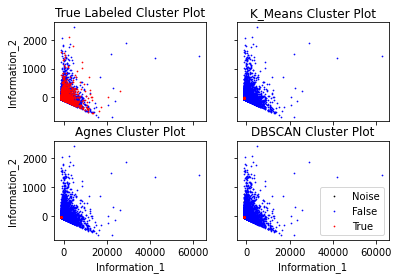

In [ ]:
fig, axs = plt.subplots(2, 2)

axs[0,0].scatter(pca_data[True_Label==0, 0], pca_data[True_Label==0, 1], s=0.5, c='blue', label ='False')
axs[0,0].scatter(pca_data[True_Label==1, 0], pca_data[True_Label==1, 1], s=0.5, c='red', label ='True')
axs[0,0].set_title('True Labeled Cluster Plot')


axs[0,1].scatter(pca_data[Label_K_Means==0, 0], pca_data[Label_K_Means==0, 1], s=0.5, c='blue', label ='Revenue_False')
axs[0,1].scatter(pca_data[Label_K_Means==1, 0], pca_data[Label_K_Means==1, 1], s=0.5, c='red', label ='Revenue_True')
axs[0,1].set_title('K_Means Cluster Plot')

axs[1,0].scatter(pca_data[Label_AGNES==0, 0], pca_data[Label_AGNES==0, 1], s=0.5, c='blue', label ='False')
axs[1,0].scatter(pca_data[Label_AGNES==1, 0], pca_data[Label_AGNES==1, 1], s=0.5, c='red', label ='True')
axs[1,0].set_title('Agnes Cluster Plot')


axs[1,1].scatter(pca_data[Label_DBSCAN==-1, 0], pca_data[Label_DBSCAN==-1, 1], s=0.5, c='black', label ='Noise')
axs[1,1].scatter(pca_data[Label_DBSCAN==0, 0], pca_data[Label_DBSCAN==0, 1], s=0.5, c='blue', label ='False')
axs[1,1].scatter(pca_data[Label_DBSCAN==1, 0], pca_data[Label_DBSCAN==1, 1], s=0.5, c='red', label ='True')
axs[1,1].set_title('DBSCAN Cluster Plot')
axs[1,1].legend();

for ax in axs.flat:
    ax.set(xlabel='Information_1', ylabel='Information_2')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# ***Different Cluster approach***

In [ ]:
data = DF_C
data = data.drop('Revenue', axis=1)

pca = PCA(n_components=3)
pca_data = pca.fit_transform(data)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Normalize_pca_data = normalize(pca_data)
DF_pca_data = pd.DataFrame(data = Normalize_pca_data, columns = ['principal_component1', 'principal_component2', 'principal_component3'] )

info = pd.Series(DF_pca_data.principal_component1).array
Variable_1 = pd.DataFrame(data = info, columns = ['information'] )
info_2 = pd.Series(DF_pca_data.principal_component2).array
Variable_2 = pd.DataFrame(data = info_2, columns = ['information_2'] )

DF_finale = pd.concat((Variable_1, Variable_2), axis=1)

Explained variation per principal component: [0.98773232 0.00754394 0.00448199]


In [ ]:
db = DBSCAN(eps=0.25, min_samples=20).fit(DF_finale)
db_labels = db.labels_

kmeans =  KMeans(n_clusters=2).fit(DF_finale) 
kmeans_labels = kmeans.labels_

Agnes = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
predict_label = Agnes.fit_predict(DF_finale)
agnes_labels = Agnes.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db_labels)) - (1 if -1 in db_labels else 0)
n_noise_ = list(db_labels).count(-1)


print("For kmeans Homogeneity: %0.3f" % metrics.homogeneity_score(True_Label, kmeans_labels))
print("For kmeans Completeness: %0.3f" % metrics.completeness_score(True_Label, kmeans_labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(DF_finale, kmeans_labels))
print("")
print("For dbscan Homogeneity: %0.3f" % metrics.homogeneity_score(True_Label, agnes_labels))
print("For dbscan Completeness: %0.3f" % metrics.completeness_score(True_Label, agnes_labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(DF_finale, agnes_labels))
print("")
print('For dbscan Estimated number of clusters: %d' % n_clusters_)
print('For dbscan Estimated number of noise points: %d' % n_noise_)
print("For dbscan Homogeneity: %0.3f" % metrics.homogeneity_score(True_Label, db_labels))
print("For dbscan Completeness: %0.3f" % metrics.completeness_score(True_Label, db_labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(DF_finale, db_labels))


For kmeans Homogeneity: 0.025
For kmeans Completeness: 0.017
Silhouette Coefficient: 0.863

For dbscan Homogeneity: 0.023
For dbscan Completeness: 0.016
Silhouette Coefficient: 0.856

For dbscan Estimated number of clusters: 1
For dbscan Estimated number of noise points: 7
For dbscan Homogeneity: 0.000
For dbscan Completeness: 0.000
Silhouette Coefficient: 0.131


Explained variation per principal component: [0.98773232 0.00754394]


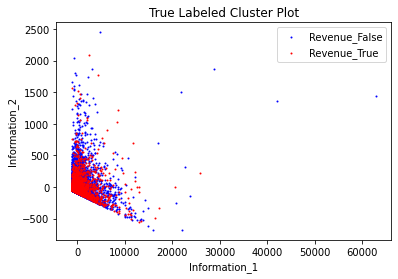

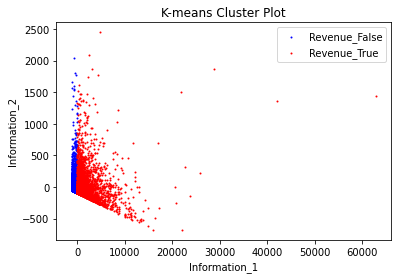

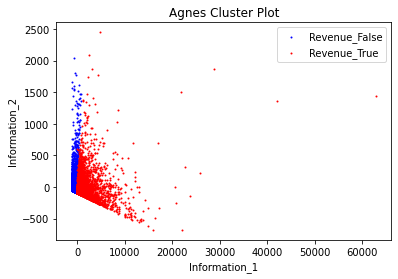

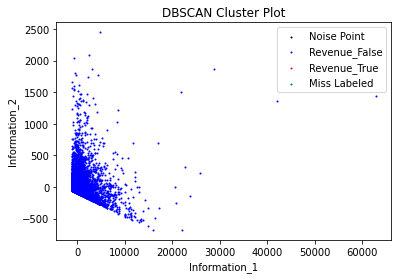

In [ ]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import normalize 
import matplotlib.pyplot as plt

True_Label = DF_C.Revenue
DF_C_temp = DF_C
DF_C_temp = DF_C_temp.drop('Revenue', axis=1)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(DF_C_temp)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

#X_Approach = pd.Series(DF_finale).array
plt.scatter(pca_data[True_Label==0, 0], pca_data[True_Label==0, 1], s=1, c='blue', label ='Revenue_False')
plt.scatter(pca_data[True_Label==1, 0], pca_data[True_Label==1, 1], s=1, c='red', label ='Revenue_True')
plt.title('True Labeled Cluster Plot')
plt.xlabel('Information_1')
plt.ylabel('Information_2')
plt.legend();
plt.show()

plt.scatter(pca_data[kmeans_labels==0, 0], pca_data[kmeans_labels==0, 1], s=1, c='blue', label ='Revenue_False')
plt.scatter(pca_data[kmeans_labels==1, 0], pca_data[kmeans_labels==1, 1], s=1, c='red', label ='Revenue_True')
plt.title('K-means Cluster Plot')
plt.xlabel('Information_1')
plt.ylabel('Information_2')
plt.legend();
plt.show()


plt.scatter(pca_data[agnes_labels==0, 0], pca_data[agnes_labels==0, 1], s=1, c='blue', label ='Revenue_False')
plt.scatter(pca_data[agnes_labels==1, 0], pca_data[agnes_labels==1, 1], s=1, c='red', label ='Revenue_True')
plt.title('Agnes Cluster Plot')
plt.xlabel('Information_1')
plt.ylabel('Information_2')
plt.legend();
plt.show()


plt.scatter(pca_data[db_labels==-1, 0], pca_data[db_labels==-1, 1], s=1, c='black', label ='Noise Point')
plt.scatter(pca_data[db_labels==0, 0], pca_data[db_labels==0, 1], s=1, c='blue', label ='Revenue_False')
plt.scatter(pca_data[db_labels==1, 0], pca_data[db_labels==1, 1], s=1, c='red', label ='Revenue_True')
plt.scatter(pca_data[db_labels==2, 0], pca_data[db_labels==2, 1], s=1, c='green', label ='Miss Labeled')
plt.title('DBSCAN Cluster Plot')
plt.xlabel('Information_1')
plt.ylabel('Information_2')
plt.legend();
plt.show()


